In [18]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

All Merged.csv has the date, Investment in google and facebook from restaurant, and that summed up into the columns:
<ul>
<li>Total_G: Totalof all Google investments
<li>Total_FB: Total of all FB investments
<li>Total: Total across both FB and Google
</ul>
It also contains the total revenue recieved that day across all venues.

The restaurant wise cost is not necessary to build the model, and were only used to derive the total columns described above

In [4]:
data=pd.read_csv("./All all data/All Merged.csv")
data=data.dropna() #Remove null values
data.head()

,Day,Cost_Aaliya_FB,Cost_Alloro_FB,Cost_Alloro_G,Cost_Beastro_FB,Cost_Beastro_G,Cost_Blacksmith_FB,Cost_Blacksmith_G,Cost_Blacksmith BB_FB,Cost_Brambles_FB,...,Cost_Soluna_G,Cost_VB_G,Cost_VB_FB,Cost_Vyne_FB,Cost_Vyne_G,Total,Total_FB,Total_G,NETSALESTOTAL,Revenue
0,2021-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,301.26,301.26,0.0,30876.75,77490
1,2021-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,995.31,995.31,0.0,35464.50,92239
2,2021-03-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,967.14,967.14,0.0,29394.50,69241
3,2021-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,988.20,988.20,0.0,32760.45,48013
4,2021-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1032.63,1032.63,0.0,37896.75,62560


In [5]:
data['Total_FB']=data['Total_FB']*3.67 #Convert FB cost from USD to AED
data['Total']=data['Total_FB']+data['Total_G'] #Update the total column
data.head()

,Day,Cost_Aaliya_FB,Cost_Alloro_FB,Cost_Alloro_G,Cost_Beastro_FB,Cost_Beastro_G,Cost_Blacksmith_FB,Cost_Blacksmith_G,Cost_Blacksmith BB_FB,Cost_Brambles_FB,...,Cost_Soluna_G,Cost_VB_G,Cost_VB_FB,Cost_Vyne_FB,Cost_Vyne_G,Total,Total_FB,Total_G,NETSALESTOTAL,Revenue
0,2021-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1105.6242,1105.6242,0.0,30876.75,77490
1,2021-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3652.7877,3652.7877,0.0,35464.50,92239
2,2021-03-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3549.4038,3549.4038,0.0,29394.50,69241
3,2021-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3626.6940,3626.6940,0.0,32760.45,48013
4,2021-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3789.7521,3789.7521,0.0,37896.75,62560


Only pick the columns that we will use in the model:

In [7]:
prophetdf=data[['Day','Total','Total_FB','Total_G','Revenue']].copy()
prophetdf.head()

,Day,Total,Total_FB,Total_G,Revenue
0,2021-03-25,1105.6242,1105.6242,0.0,77490
1,2021-03-26,3652.7877,3652.7877,0.0,92239
2,2021-03-27,3549.4038,3549.4038,0.0,69241
3,2021-03-28,3626.6940,3626.6940,0.0,48013
4,2021-03-29,3789.7521,3789.7521,0.0,62560


In [8]:
#Added new columns to allow the model better learn patterns
import datetime
def weekOfYear(x):
    return int(datetime.date(*list(map(int,x.split('-')))).strftime('%W'))

def weekOfMonth(x):
    y,m,d=x.split('-')
    return weekOfYear(x)-weekOfYear(y+'-'+m+'-01')

prophetdf['weekOfYear']=prophetdf['Day'].apply(weekOfYear)    
prophetdf['weekOfMonth']=prophetdf['Day'].apply(weekOfMonth)
prophetdf.head()

,Day,Total,Total_FB,Total_G,Revenue,weekOfYear,weekOfMonth
0,2021-03-25,1105.6242,1105.6242,0.0,77490,12,3
1,2021-03-26,3652.7877,3652.7877,0.0,92239,12,3
2,2021-03-27,3549.4038,3549.4038,0.0,69241,12,3
3,2021-03-28,3626.6940,3626.6940,0.0,48013,12,3
4,2021-03-29,3789.7521,3789.7521,0.0,62560,13,4


In [10]:
y=prophetdf['Revenue'] #To predict
prophetdf=pd.concat([prophetdf['Day'],y,prophetdf.drop(['Day','Revenue'],axis=1)],axis=1) 
#Prophet needs the dataframe to be in the right format
#Format required: Date, Target, [Additional Columns ("extra regressors")]
prophetdf.columns=['ds','y','TCost','FCost','GCost','weekOfYear','weekOfMonth'] #Rename columns to what Prophet expects
prophetdf.head()

,ds,y,TCost,FCost,GCost,weekOfYear,weekOfMonth
0,2021-03-25,77490,1105.6242,1105.6242,0.0,12,3
1,2021-03-26,92239,3652.7877,3652.7877,0.0,12,3
2,2021-03-27,69241,3549.4038,3549.4038,0.0,12,3
3,2021-03-28,48013,3626.6940,3626.6940,0.0,12,3
4,2021-03-29,62560,3789.7521,3789.7521,0.0,13,4


----------------

# Try training on all days except last 30 days and test on last 30 days
(Will train the model on the full data before deployment at the end of this notebook)

### Skip till next heading if youre just interested in retraining the model for the website

In [12]:
train,test=prophetdf[:-30],prophetdf[-30:].reset_index(drop=True)
train.head()

,ds,y,TCost,FCost,GCost,weekOfYear,weekOfMonth
0,2021-03-25,77490,1105.6242,1105.6242,0.0,12,3
1,2021-03-26,92239,3652.7877,3652.7877,0.0,12,3
2,2021-03-27,69241,3549.4038,3549.4038,0.0,12,3
3,2021-03-28,48013,3626.6940,3626.6940,0.0,12,3
4,2021-03-29,62560,3789.7521,3789.7521,0.0,13,4


In [13]:
model = Prophet()
#Add other regressors to allow for better prediction: 'TCost','FCost','GCost','weekOfYear','weekOfMonth'
model.add_regressor('TCost')
model.add_regressor('GCost')
model.add_regressor('FCost')
model.add_regressor('weekOfYear')
model.add_regressor('weekOfMonth')
model.fit(train)

02:11:32 - cmdstanpy - INFO - Chain [1] start processing
02:11:32 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
forecast = model.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,FCost,FCost_lower,FCost_upper,GCost,...,weekOfYear,weekOfYear_lower,weekOfYear_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-23,244918.224880,177404.932886,274580.936091,244918.224880,244918.224880,179.452580,179.452580,179.452580,11264.272363,...,-16195.001254,-16195.001254,-16195.001254,-22637.911783,-22637.911783,-22637.911783,0.0,0.0,0.0,223158.149479
1,2023-01-24,245623.252327,183116.954482,279715.706503,245623.252327,245623.252327,278.446690,278.446690,278.446690,11781.645135,...,-16195.001254,-16195.001254,-16195.001254,-16244.557811,-16244.557811,-16244.557811,0.0,0.0,0.0,231330.199815
2,2023-01-25,246328.279775,194259.516317,288178.469631,246328.279775,246328.279775,347.945082,347.945082,347.945082,13821.176540,...,-16195.001254,-16195.001254,-16195.001254,-9461.112725,-9461.112725,-9461.112725,0.0,0.0,0.0,241457.736759
3,2023-01-26,247033.307222,207237.881907,305746.387399,247033.307222,247033.307222,477.673827,477.673827,477.673827,14516.241239,...,-16195.001254,-16195.001254,-16195.001254,4132.711301,4132.711301,4132.711301,0.0,0.0,0.0,257182.789291
4,2023-01-27,247738.334669,246422.627592,342130.880636,247738.334669,247738.354921,832.932835,832.932835,832.932835,16166.503353,...,-16195.001254,-16195.001254,-16195.001254,36358.821383,36358.821383,36358.821383,0.0,0.0,0.0,293734.826867


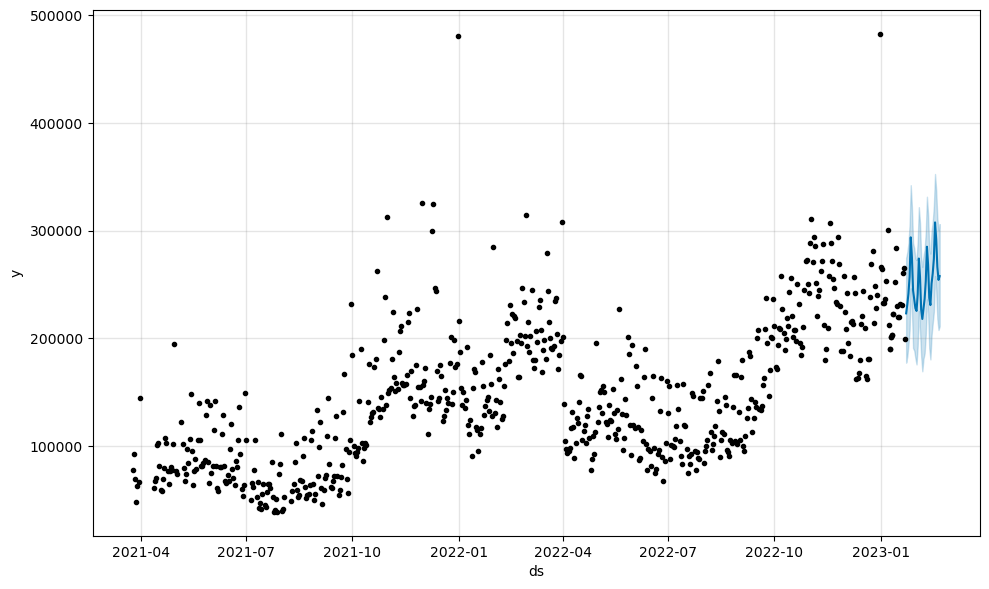

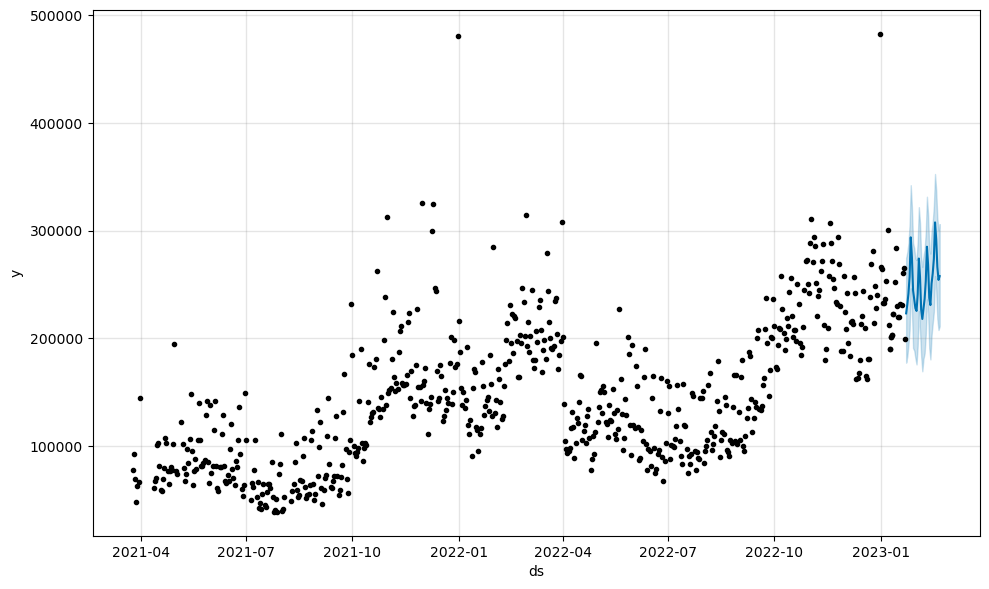

In [15]:
model.plot(forecast) #Plot the trained points (black dots) and the new predictions (blue lines)

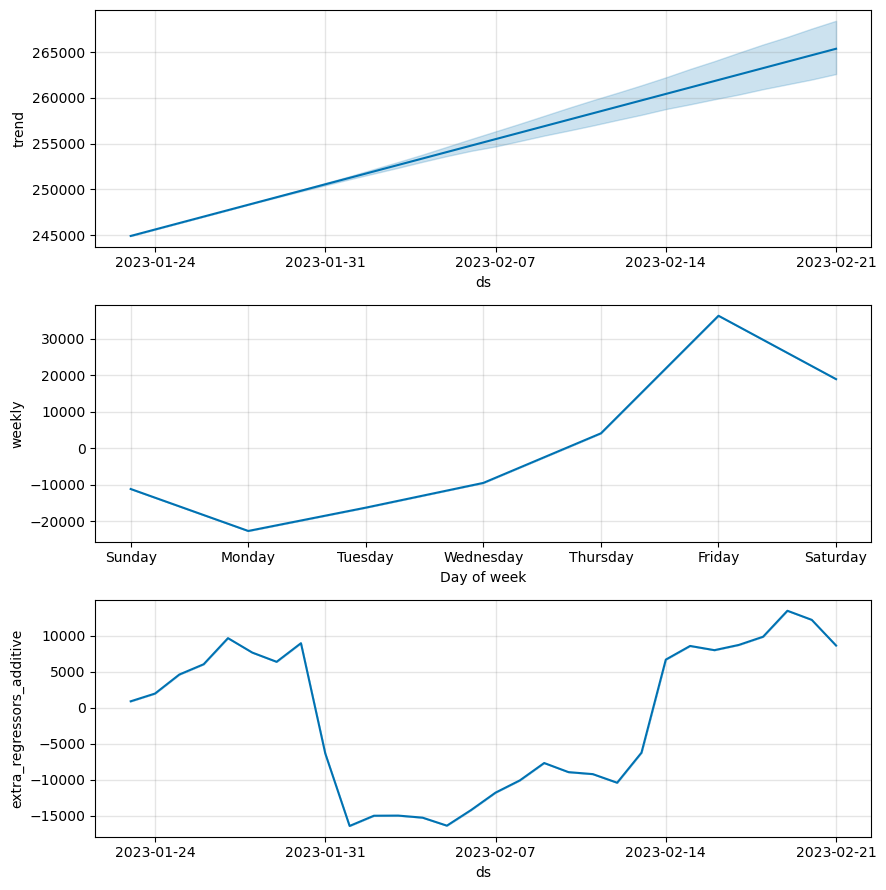

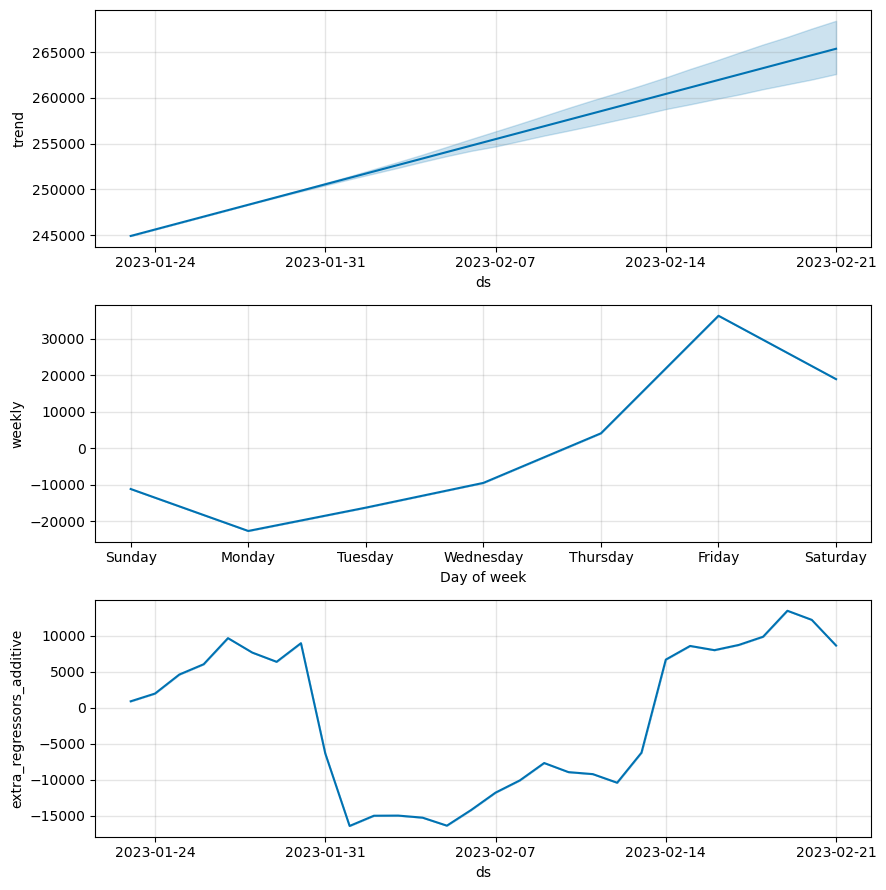

In [16]:
model.plot_components(forecast) #More details about trends daily/weekly/yearly

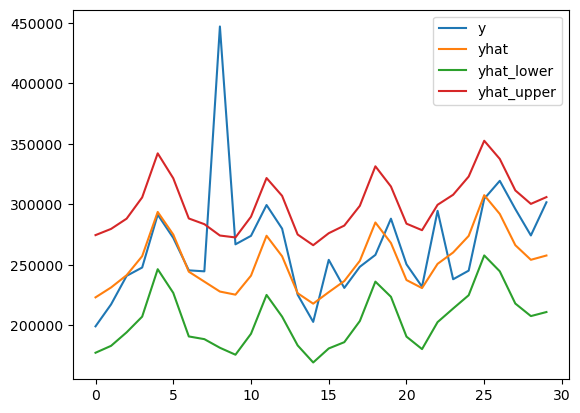

In [19]:
plt.plot(test['y'],label='y')
plt.plot(forecast['yhat'],label='yhat')
plt.plot(forecast['yhat_lower'],label='yhat_lower')
plt.plot(forecast['yhat_upper'],label='yhat_upper')
plt.legend()
plt.show()

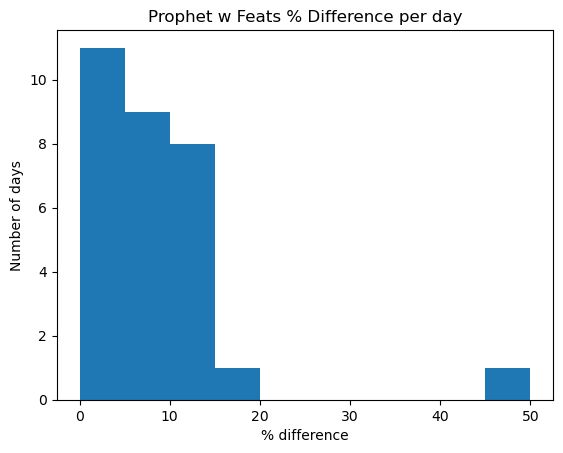

In [24]:
rfeats=forecast[['ds','yhat_lower','yhat_upper','yhat']]
rfeats=pd.concat([rfeats,test.reset_index().y],axis=1)
rfeats.columns=['Date','Min','Max','Pred','Real']
rfeats['PredDiff']=abs(rfeats['Real']-rfeats['Pred'])
rfeats['%diff_Pred']=abs((rfeats['Real']-rfeats['Pred'])/rfeats['Real'])*100

plt.hist(rfeats['%diff_Pred'],bins=list(range(0,51,5)))
plt.title('Prophet w Feats % Difference per day')
plt.xlabel("% difference")
plt.ylabel("Number of days")
plt.show()

Since most days have <=20% difference, the model is performing very well.

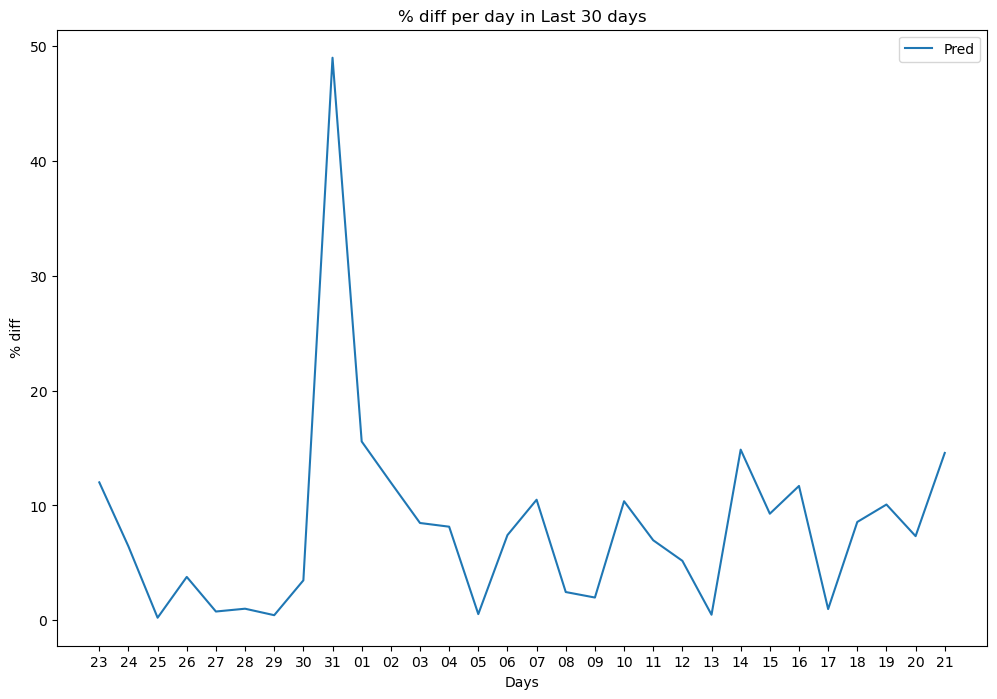

In [25]:
def plotMonthWise(data,file,monthname,isProphet=False):
    plt.figure(figsize=(12,8))
    if isProphet:
        plt.plot(data['Date'].apply(lambda x:x.strftime('%Y-%m-%d')[-2:]),data['%diff_Pred'])
        plt.legend(['Pred'])
    else:
        plt.plot(data['Date'].apply(lambda x:x[-2:]),data['%diff'])
    plt.title("% diff per day in "+monthname)
    plt.xlabel("Days")
    plt.ylabel("% diff")
    #plt.savefig(file[:-4]+' '+monthname+'.png')
    plt.show()
plotMonthWise(rfeats,'file','Last 30 days',True)

-----------------

# Now that we know the model is doing very well, we can train it on the full dataset expecting similiar results:

In [26]:
model = Prophet()
model.add_regressor('TCost')
model.add_regressor('GCost')
model.add_regressor('FCost')
model.add_regressor('weekOfYear')
model.add_regressor('weekOfMonth')
#All data is stored in prophetdf
model.fit(prophetdf)

02:20:12 - cmdstanpy - INFO - Chain [1] start processing
02:20:12 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Save model:
from prophet.serialize import model_to_json, model_from_json
with open('serialized_model_AED_all_data_feb21.json', 'w') as fout:
    fout.write(model_to_json(model))  # Save model
#Change the line the Demo.py file to add the updated file name and place this json file in the same location as Demo.py